# Exercise 10-1: Create a linear regression

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [4]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish.rename(columns={
    'Length1': 'Vertical Length (cm)',
    'Length2': 'Diagonal Length (cm)',
    'Length3': 'Cross Length (cm)'
}, inplace=True)

# Save the modified DataFrame back to a CSV file
fish.to_csv('Fish.csv', index=False)

## Identify a correlation

In [5]:
# get the correlation data for the Weight column
#selecting only numerical data
numeric_data = fish.select_dtypes('float64', 'int64')

#computing correlations
correlation = numeric_data.corr()

<Axes: >

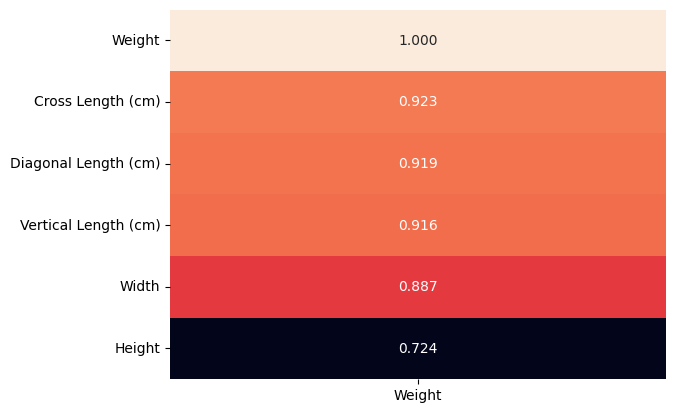

In [6]:
# create a heatmap for the correlation data
sns.heatmap(correlation[['Weight']].sort_values(
    by='Weight', ascending=False), annot=True, fmt='.3f', cbar=False)

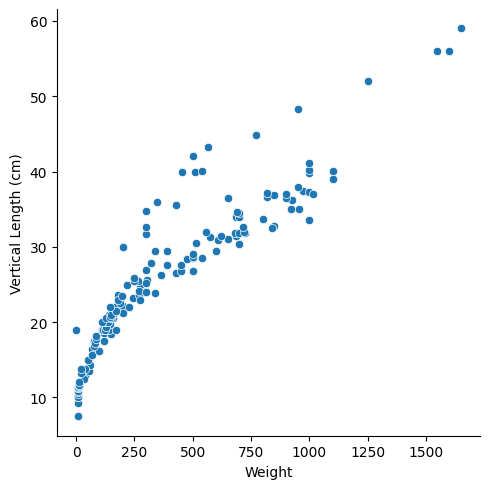

In [7]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish, x='Weight', y='Vertical Length (cm)')

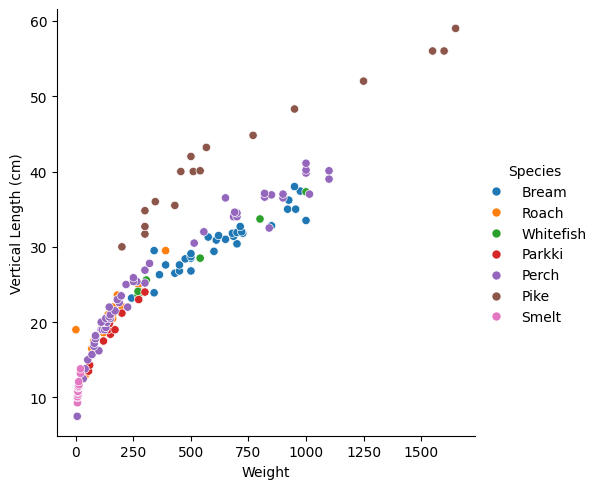

In [8]:
# create the same scatterplot as the previous cell, but use color to identify each species
sns.relplot(data=fish, x='Weight', y='Vertical Length (cm)', hue='Species')

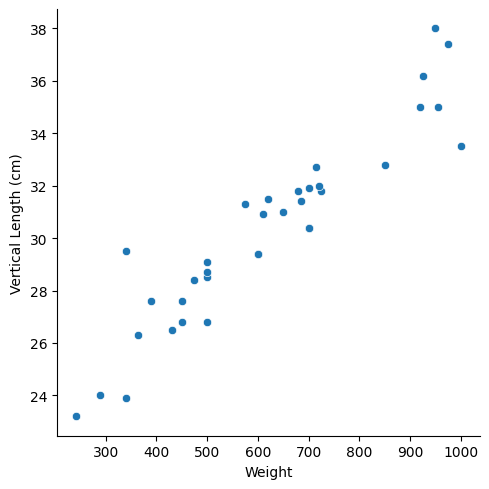

In [9]:
# create the same scatterplot as the previous cell, but only display data for the Bream species
bream_data = fish[fish['Species'] == 'Bream']
sns.relplot(data=bream_data, x='Weight', y='Vertical Length (cm)')


## Create a linear model

In [10]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream_data = fish[fish['Species'] == 'Bream']

In [11]:
#let's get the strongest feature
strongest_feature = correlation['Weight'].drop('Weight').idxmax()

In [12]:
# split the training and testing data
X = fish[[strongest_feature]]
y = fish['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

print(strongest_feature)
print(X_train.shape[0])
print(X_test.shape[0])

Cross Length (cm)
111
48


In [13]:
# create the model and fit the training data
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient for: '{strongest_feature}': {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient for: 'Cross Length (cm)': 29.093224524546116
Intercept: -514.07127993115


In [14]:
# score the testing data
test_score = model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.8267697529759579


In [23]:
# make the predictions
test= X_test, y_test
y_pred = model.predict(X_test)
y_pred

array([  50.33727585, -121.31274885,  498.37293352,  320.90426392,
        198.71272092,  725.30008481, -176.58987545,  297.6296843 ,
        248.17120261, 1222.79422418,  611.83650917,  751.48398689,
        568.19667238,  137.61694942,  664.20431331,  768.9399216 ,
        824.2170482 ,  300.53900676,  227.80594544,  600.19921936,
       -132.95003866,  608.92718672,  544.92209276,  539.10344786,
        766.03059915,  809.67043594,  213.25933318,  338.36019864,
       -199.86445507, -132.95003866,  809.67043594,   24.15337377,
        -13.66781811,  902.76875441,  390.72800278,  169.6194964 ,
        221.98730054,  175.4381413 ,  187.07543111,  687.47889293,
        667.11363577,  882.40349725, -176.58987545,  169.6194964 ,
        160.89152904,   76.52117792,  140.52627187,  640.92973369])

## Plot the regression line

In [51]:
# join the predicted data with the original data
pred = pd.DataFrame(y_pred, columns=['predicted_weight'])
combined = pred.join([X_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
combined

,predicted_weight,Cross Length (cm),Weight
0,50.337276,19.4,78.0
1,-121.312749,13.5,13.4
2,498.372934,34.8,200.0
3,320.904264,28.7,270.0
4,198.712721,24.5,150.0
5,725.300085,42.6,1000.0
6,-176.589875,11.6,7.0
7,297.629684,27.9,180.0
8,248.171203,26.2,188.0
9,1222.794224,59.7,1250.0


In [52]:
# melt the actual and predicted data
melted = pd.melt(combined, id_vars=[strongest_feature],
value_vars=['Weight', 'predicted_weight'],
var_name='Type', value_name='Melted Weight')
melted

,Cross Length (cm),Type,Melted Weight
0,19.4,Weight,78.000000
1,13.5,Weight,13.400000
2,34.8,Weight,200.000000
3,28.7,Weight,270.000000
4,24.5,Weight,150.000000
...,...,...,...
91,23.5,predicted_weight,169.619496
92,23.2,predicted_weight,160.891529
93,20.3,predicted_weight,76.521178
94,22.5,predicted_weight,140.526272


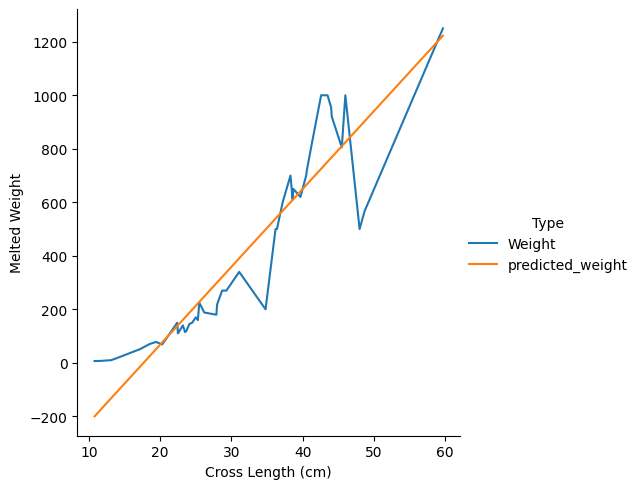

In [53]:
# use relplot() to plot the actual and predicted data
sns.relplot(data=melted, kind='line', x=strongest_feature, y='Melted Weight', hue='Type', errorbar=None)

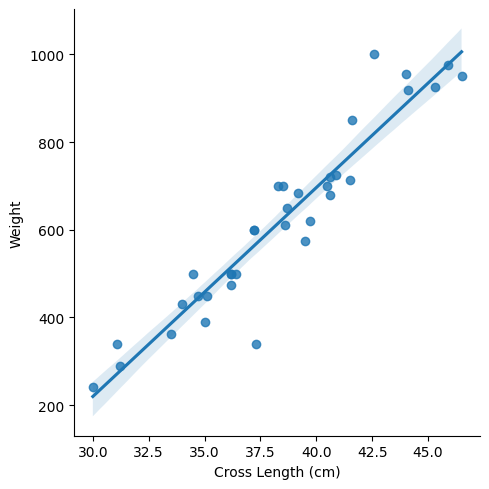

In [54]:
# use lmplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
sns.lmplot(data=bream_data, x=strongest_feature, y='Weight', markers=['o'], palette='deep')

## Plot the residuals

In [55]:
# calculate the residuals and store them in a column
combined['Residuals'] = combined.Weight - combined.predicted_weight
combined.head()

,predicted_weight,Cross Length (cm),Weight,Residuals
0,50.337276,19.4,78.0,27.662724
1,-121.312749,13.5,13.4,134.712749
2,498.372934,34.8,200.0,-298.372934
3,320.904264,28.7,270.0,-50.904264
4,198.712721,24.5,150.0,-48.712721


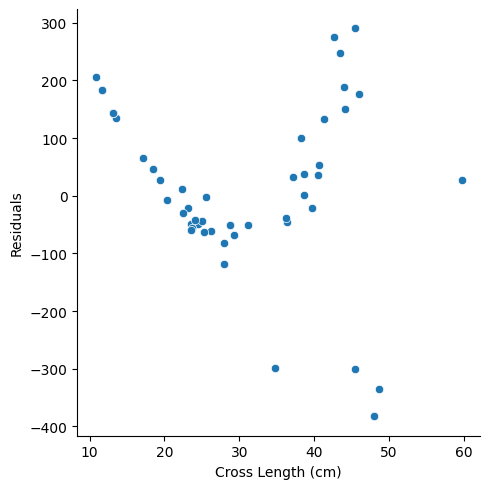

In [56]:
# use relplot() to create a scatterplot for the residuals
sns.relplot(data=combined, x=strongest_feature, y='Residuals', kind='scatter', marker='o')

In [66]:
bream_data.head()

,Species,Weight,Vertical Length (cm),Diagonal Length (cm),Cross Length (cm),Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


C:\Users\s225146371\AppData\Local\Temp\ipykernel_10016\4039643261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bream_data['predicted_weight'] = model.predict(bream_features)
C:\Users\s225146371\AppData\Local\Temp\ipykernel_10016\4039643261.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bream_data['Residuals'] = bream_data['Weight'] - bream_data['predicted_weight']


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

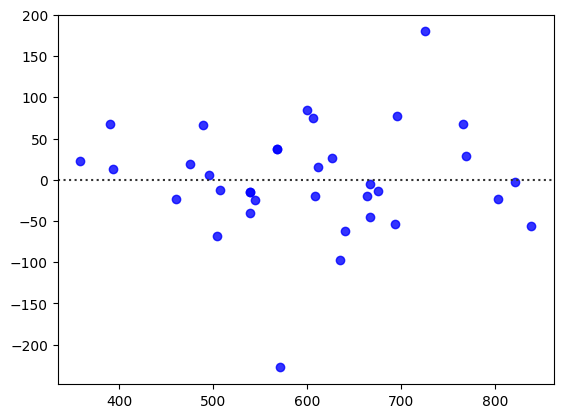

In [73]:
# use residplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method
features = [ 'Cross Length (cm)']  # Adjust according to your model
bream_features = bream_data[features]

# Make predictions
bream_data['predicted_weight'] = model.predict(bream_features)

# Calculate the residuals
bream_data['Residuals'] = bream_data['Weight'] - bream_data['predicted_weight']

# Create a residual plot
sns.residplot(x='predicted_weight', y='Residuals', data=bream_data, lowess=True, color='blue')

# Show the plot
plt.title('Residual Plot for Bream')
plt.xlabel('Predicted Weight')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Optional: add a horizontal line at y=0
plt.show()